### CME Polar PLot


- All associated to X-class flares 


- Spot size $\rightarrow$ SMART AR total area or flux 


- Arm length $\rightarrow$ CME speed


- Arm width $\rightarrow$ CME Halo Flag

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sunpy.map
import matplotlib.colors
import matplotlib as mpl
from matplotlib.colors import colorConverter

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [127]:
# Props
dfx = df[['cme_angle', 
          'cme_halo', 
          'cme_speed', 
          'smart_observation_time', 
          'smart_hcx_position', 
          'smart_hcy_position',
          'smart_total_area',
          'smart_total_flux', 
          'goes_flux']]

dfx = dfx.dropna(how='any')
dfx.goes_flux = np.log10(dfx.goes_flux)
dfx.smart_total_flux = dfx.smart_total_flux.values.astype(float)
dfx = dfx.reset_index(drop=True)

# Look at big CMEs only
x = dfx[ (dfx['goes_flux'] >= -4.0)]  
x = x.reset_index(drop=True)

# M-class for stats
m = dfx[ (dfx['goes_flux'] >= -5.0)  & (dfx['goes_flux'] < -4.0) ]  
m = m.reset_index(drop=True)

# Halos
x['cme_halo'] = x['cme_halo'].replace([1.0],1)
x['cme_halo'] = x['cme_halo'].replace([2.0],2)
x['cme_halo'] = x['cme_halo'].replace([3.0],3)
x['cme_halo'] = x['cme_halo'].replace([4.0],4)

# colours and sizes
x_dates = x['smart_observation_time'].values.astype(float)
size_a = 50*x.smart_total_area/x.smart_total_area.mean()
size_f = 50*x.smart_total_flux/x.smart_total_flux.mean()

<ipython-input-128-707226093421>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000', '2500', '3000'], fontsize=16)


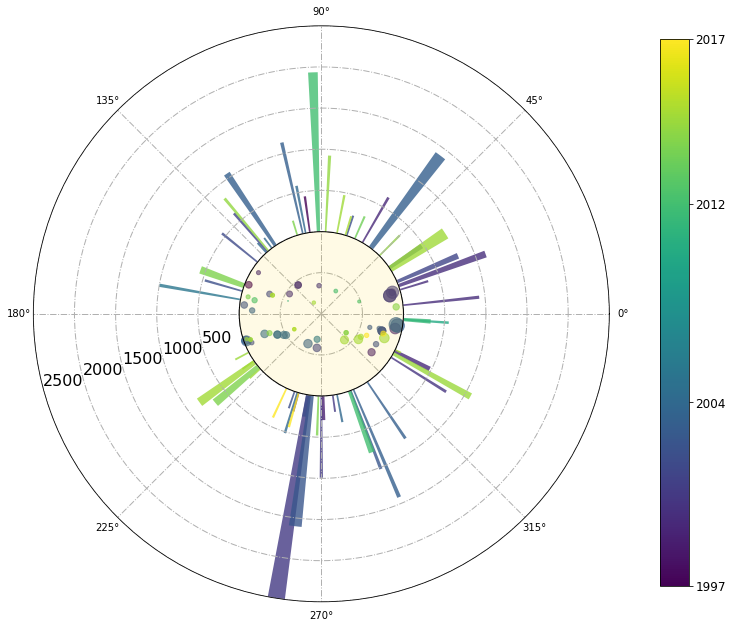

In [128]:
# Plotting
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(min(x_dates), max(x_dates))

# CMEs
fig = plt.figure(figsize=(4, 4), facecolor='white')
ax1 = plt.axes([0.025, 0.025, 2, 2], polar=True)
ax1.bar(x=x.cme_angle/180*np.pi, height=x.cme_speed, width=1/50*x.cme_halo, bottom=1000, alpha=0.8, color=cmap(norm(x_dates)))
ax1.set_ylim(0,3500)
ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000', '2500', '3000'], fontsize=16)
ax1.grid(linewidth=1, linestyle='-.')
ax1.set_rlabel_position(195)

fc = colorConverter.to_rgba('gold', alpha=0.1)

# ARs
ax2 = plt.axes([0.728, 0.728, 0.594, 0.594])
ax2.set_axis_off()
circ = plt.Circle((0, 0), 960, transform=ax2.transData._b, ec='k', lw=1, fc=fc, fill=True)
ax2.add_artist(circ)
sct = ax2.scatter(x['smart_hcx_position'], x['smart_hcy_position'], s=size_f, c=x_dates, alpha=0.6)
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(-1000, 1000)

# colourbar
ax3 = plt.axes([2.2, 0.08, 0.1, 1.9])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax3, orientation='vertical',
                  ticks=[min(x_dates), x_dates[32], x_dates[37], max(x_dates)])
cb.ax.set_yticklabels(['1997', '2004', '2012', '2017'], fontsize=12)

# Previous config
#ax2 = plt.axes([0.680, 0.676, 0.69, 0.698])
#ticks=[min(x_dates), x_dates[23], x_dates[29], max(x_dates)])
#cb.ax.set_yticklabels(['1997-11-27', '2004-07-15', '2011-03-09', '2017-09-07'], fontsize=12)

#plt.savefig('cme_polar_plot_v5.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

### Stats

In [59]:
print(len(m.cme_speed))
print(len(x.cme_speed))
print('\n7225 days (19 years, 9 months, 12 days) between first and last detection')
print('\nMiddle date = Tuesday, 24 June 2008')
print('\nSplit into 3: Wednesday, 15 December 2004, Monday, 2 January 2012')

763
57

7225 days (19 years, 9 months, 12 days) between first and last detection

Middle date = Tuesday, 24 June 2008

Split into 3: Wednesday, 15 December 2004, Monday, 2 January 2012


In [73]:
print('M-class:',round((len(m.cme_speed)/len(dfx.cme_speed))*100, 2),'%')
print('X-class:',round((len(x.cme_speed)/len(dfx.cme_speed))*100, 2),'%')
print('Both:',round(((len(m.cme_speed) + len(x.cme_speed))/len(dfx.cme_speed))*100, 2),'%')

M-class: 11.97 %
X-class: 0.89 %
Both: 12.86 %


In [103]:
# Fastest CME 
x.iloc[11]

cme_angle                                 261
cme_halo                                    3
cme_speed                                2505
smart_observation_time    2001-04-02 20:48:00
smart_hcx_position                      831.9
smart_hcy_position                     252.23
smart_total_area                      41415.7
smart_total_flux                     3.39e+23
goes_flux                            -2.69897
Name: 11, dtype: object

In [107]:
x.iloc[51]

cme_angle                                  33
cme_halo                                    4
cme_speed                                 795
smart_observation_time    2014-11-07 16:58:00
smart_hcx_position                    -570.16
smart_hcy_position                     217.38
smart_total_area                      2768.71
smart_total_flux                     3.57e+22
goes_flux                            -3.79588
Name: 51, dtype: object

In [132]:
print(df[df.cme_speed==2505].index.values)

[4256]


In [134]:
dft = df[['cme_speed', 'cme_halo', 'goes_flux', 'smart_total_area', 'smart_total_flux', 'flare_goes_class', 'flare_peak_time']]
dft.iloc[4256]

cme_speed                          2505
cme_halo                              3
goes_flux                         0.002
smart_total_area                41415.7
smart_total_flux               3.39e+23
flare_goes_class                    X20
flare_peak_time     2001-04-02 21:51:00
Name: 4256, dtype: object